<h1> PROYECTO DE MACHINE LEARNING SUPERVISADO </h1>


<h3>Clasificando dígitos escritos a mano</h3>

El grupo de datos se los obtiene de: http://yann.lecun.com/exdb/mnist/.

MNIST - Modified National Institute of Standards and Technology

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.


<ul> train-images-idx3-ubyte.gz:  training set images </ul>
<ul> train-labels-idx1-ubyte.gz:  training set labels </ul>
<ul> t10k-images-idx3-ubyte.gz:   test set images </ul>
<ul> t10k-labels-idx1-ubyte.gz:   test set labels </ul>





Los datos en formato .gz descomprimirlos dentro de un folder **MNIST_data**

$ gzip *ubyte.gz -d


En nuestro consola de trabajo instalamos el paquete mnist que viene con python:

**$ pip install python-mnist**


Una reserva de esta info, podemos encontrar estos set de datos en formato .csv en kaggle: https://www.kaggle.com/c/digit-recognizer/data 


In [1]:
# DATOS

# importar
from mnist import MNIST


#importar el dataset
mndata = MNIST('MNIST_data')

In [2]:
# DATOS de entrenamiento (features -> images y labels -> labels)
# (features -> datos y labels -> etiquetas)
datos, labels = mndata.load_training()

In [3]:
# VISUALIZACION 

# librerías
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
# Trabajo con ARRAYs

# import NUMPY
import numpy as np

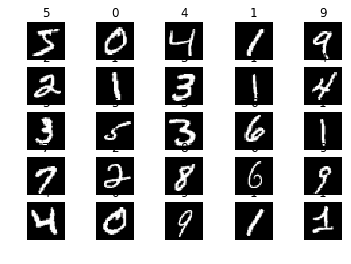

In [5]:
# matplotlib escala de grises
plt.gray()


for i in range(25):
    plt.subplot(5,5,i+1)
    
    d_image = datos[i]
    d_image = np.array(d_image, dtype='float')
    
    pixels = d_image.reshape((28, 28))
    
    plt.imshow(pixels, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [6]:
# sk-learn para dividir todo el set de entrenamiento en: entrenamiento y validación
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

In [7]:
# DATOS 
# todos los datos de training... deben ser divididos

#  -Datos de Entremamiento 70%  (features, labels)
#  -Datos de Testing  30%   (features y labels)

# sklearn.model_selection.train_test_split(*arrays, **options)

# train_data, test_data, train_labels, test_labels
train_data, test_data, train_labels, test_labels = train_test_split(datos, labels, test_size=0.3, random_state=42)

<h3>Modelos y Entrenamiento</h3>

In [8]:
# SKLEARN
# que es como se usa

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

Los datos estan listo para ser entrenados en nuestro clasificador.

Vamos a seleccionar entre las diferentes opciones de Machine Learning supervisado:

* Arbol de decisiones "Decision Tree"
* Random Forest

In [9]:
# SKLEARN
# modelos de ML


# decision tree
from sklearn.tree import DecisionTreeClassifier

class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)[source]

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [10]:
# creamos el clasificador

clf_dt = DecisionTreeClassifier()

In [11]:
# entrenar (fit)

clf_dt.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<h3> Evaluación </h3>

Utilizando la SKLEARN 
Matriz de Confusión

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [12]:
# importar librería para las metricas de evaluación
from sklearn.metrics import confusion_matrix

In [13]:
# definimos una funcion para evaluar el clasificador
def evaluate_classifier(clf, test_data, test_labels):
    pred = clf.predict(test_data)
    
    MC = confusion_matrix(test_labels, pred)
    return MC

In [14]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

# evaluar clasificador: ARBOL DE DECISIONES, datos de evaluación: test_data, test_labels
MC = evaluate_classifier(clf_dt, test_data, test_labels)

In [15]:
# imprimir la matriz de confusión
print(MC)

[[1647    2   22   19   17   30   20    6   29   13]
 [   2 1918   25    7    4    7    4    8   12    7]
 [  18   22 1471   54   18   21   48   36   51   20]
 [  13   16   61 1496   16   83    7   37   78   39]
 [   4    5   18   11 1494   23   27   30   26   88]
 [  29   17   31   81   19 1324   39   13   60   40]
 [  29    6   31    8   33   39 1595    1   35   10]
 [   7   15   49   19   25   16    8 1747   17   34]
 [  23   24   54   54   44   57   40   14 1358   62]
 [  16    8   23   35   77   47   12   59   48 1438]]


In [16]:
# calcular el puntaje con los valores de la matriz de confusión
score = MC.diagonal().sum()*100./MC.sum()

In [17]:
# imprimir valor del puntaje (score)
print(score)

86.04444444444445


<h3>Otros modelos</h3>

In [18]:
# SKLEARN
# modelos de ML

# importar RandomForest de sk-learn
from sklearn.ensemble import RandomForestClassifier

In [19]:
# RandomForest

# n_estimators numero de árboles que queremos en la red
# min_samples_split número mínimo de filas que utilizaremos
# min_samples_leaf número mínimo de samples que tenemos al final del árbol

# clf_rd = RandomForestClassifier(n_estimators=<numero de arboles>)
# estimamos con 150 árboles
clf_rd = RandomForestClassifier(n_estimators=150, min_samples_split=2)

In [20]:
# entrenar (fit)
clf_rd.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

# evaluar RANDOM FOREST con el metodo de evaluador clasificador
MC = evaluate_classifier(clf_rd, test_data, test_labels)

In [22]:
# imprimir valor de la matriz de confusión
print(MC)

[[1775    0    2    0    4    6    6    0   12    0]
 [   0 1965   12    5    4    0    2    2    2    2]
 [   5    7 1708    6    4    0    5   15    7    2]
 [   4    1   32 1743    1   18    1   17   19   10]
 [   4    1    1    0 1675    1    6    4    3   31]
 [   9    2    3   17    1 1581   14    1   16    9]
 [   5    1    1    0    4   10 1759    0    7    0]
 [   2   10   24    1    6    0    0 1869    5   20]
 [   1    5   11   12   13   14    7    1 1656   10]
 [   6    4    6   15   18    7    2   14    7 1684]]


In [23]:
# calcular el puntaje (score)
score = MC.diagonal().sum()*100./MC.sum()

In [24]:
# imprimir el puntaje (score)
print(score)

96.75


<h3>DATOS FINALES DE PRUEBA</h3>

In [25]:
# vamos a probar los datos de prueba

# Cargamos los datos de evaluacion
eval_data, eval_labels = mndata.load_testing()

In [26]:
# Aplicamos el clasificador a todo el dataset de Evaluacion y obtenemos el Accuracy

predicted_data = clf_rd.predict(eval_data)

In [28]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

# evaluar RANDOM FOREST con el metodo de evaluador clasificador
MC_clf_rd = evaluate_classifier(clf_rd, eval_data, np.array(eval_labels))

In [29]:
# imprimir valor de la matriz de confusión
print(MC_clf_rd)

[[ 971    0    0    0    0    2    2    1    3    1]
 [   0 1123    2    4    0    2    2    1    1    0]
 [   5    0 1000    7    2    0    4    8    6    0]
 [   1    0   10  970    0    9    0    9    8    3]
 [   1    0    2    0  953    0    5    0    3   18]
 [   4    0    2   13    3  855    6    1    6    2]
 [   6    3    0    0    3    5  938    0    3    0]
 [   1    4   21    1    1    0    0  985    4   11]
 [   3    0    5    8    3    7    5    4  930    9]
 [   6    5    1    9   14    6    2    4    6  956]]


In [30]:
# calcular el puntaje (score)
score_clf_rd = MC_clf_rd.diagonal().sum()*100./MC_clf_rd.sum()

In [31]:
# imprimir el puntaje (score)
print(score_clf_rd)

96.81


<h2>Otras pruebas</h2>

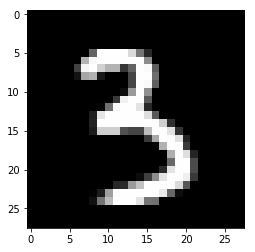

In [64]:
# Elegimos al azar una imagen del dataset de prueba. Index 8y lo graficamos para identificar q digito es

# digito seleccionado
data = 32
d = eval_data[data]
d = np.array(d, dtype='float')
pixels = d.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [66]:
# Aplicamos el clasificador a este index para ver el resultado
#digito seleccionado
print(clf_dt.predict( [eval_data[data]]))

[3]
